In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Sugar

In [2]:
def karplus_sugar(x,par="Condon"):
    R=np.pi/180 # conversion to radians, needed for some parametrizations
    
    if par=="Condon":
        # Parameters from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q
        # Also used in Barnaba https://rnajournal.cshlp.org/content/25/2/219/T1.expansion.html
        # they are derived in Condon et al based on analysis of 2KOC
        return 9.67*np.cos(x)**2-2.03*np.cos(x)
    
    elif par=="Davies":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q
        # C++ code in SI: return(10.2∗pow(cos(X) ,2.0) 0.8∗cos(X));
        # it's identical to the one reported in Table S6 from Cesari et al JCTC 2016
        # https://pubs.acs.org/doi/suppl/10.1021/acs.jctc.6b00944/suppl_file/ct6b00944_si_001.pdf
        # Also Bottaro et al, NAR 2016 https://academic.oup.com/nar/article/44/12/5883/2457500?login=false
        # SI table 1.
        # attributed to Davies, D. B. Prog Nucl Magn Reson Spectrosc 1978, 12, 135–225.
        return 10.2*np.cos(x)**2-0.8*np.cos(x)
    
    elif par=="Haasnoot12":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (12) in SI
        # specific for H1'-H2'
        return (
            2.33+13.24*np.cos(x)**2-0.91*np.cos(x)-2.41*np.cos(x+16*R)**2
            -1.74*np.cos(11*R-x)**2-3.32*np.cos(21*R-x)**2-3.13*np.cos(x+20*R)**2
        )
    
    elif par=="Haasnoot12-check":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (11) in SI. Should be identical to Eq. (12)
        # indeed they are (confirmed)
        # specific for H1'-H2'
        return (
            13.24*np.cos(x)**2-0.91*np.cos(x)
            +(0.53-2.41*(np.cos(x+15.5*1.002*R))**2)*1.002
            +(0.53-2.41*(np.cos(-x+15.5*0.723*R))**2)*0.723
            +(0.53-2.41*(np.cos(-x+15.5*1.376*R))**2)*1.376
            +(0.53-2.41*(np.cos(x+15.5*1.3*R))**2)*1.3
        )
    
    elif par=="Haasnoot23":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (15) in SI
        # specific for H2'-H3'
        return (
             2.18+13.24*np.cos(x)**2-0.91*np.cos(x)-1.95*np.cos(x+13*R)**2
             -1.74*np.cos(11*R-x)**2-3.13*np.cos(20*R-x)**2-3.11*np.cos(x+20*R)**2
        )
    elif par=="Haasnoot34":
        # Copied from Condon et al 2015 https://pubs.acs.org/doi/10.1021/ct501025q 
        # Eq. (18) in SI
        # specific for H3'-H4'
        return (
             2.14+13.24*np.cos(x)**2-0.91*np.cos(x)-1.74*np.cos(x+11*R)**2
         -1.56*np.cos(10*R-x)**2-3.11*np.cos(20*R-x)**2-3.31*np.cos(x+21*R)**2
        )
    elif par=="HaasnootB12":
        # Table S6 from Cesari et al JCTC 2016
        # do not match with Condon! might be incorrect
        return (
             1.270+6.965*np.cos(x)**2-0.91*np.cos(x)+1.026*np.sin(x)*np.cos(x)
        )
    elif par=="HaasnootB23":
        # Table S6 from Cesari et al JCTC 2016
        # do not match with Condon! might be incorrect
        return (
             0.002+8.289*np.cos(x)**2-0.91*np.cos(x)+0.668*np.sin(x)*np.cos(x)
        )
    elif par=="HaasnootB34":
        # Table S6 from Cesari et al JCTC 2016
        # do not match with Condon! might be incorrect
        return (
             -0.262+7.964*np.cos(x)**2-0.91*np.cos(x)+0.772*np.sin(x)*np.cos(x)
        )


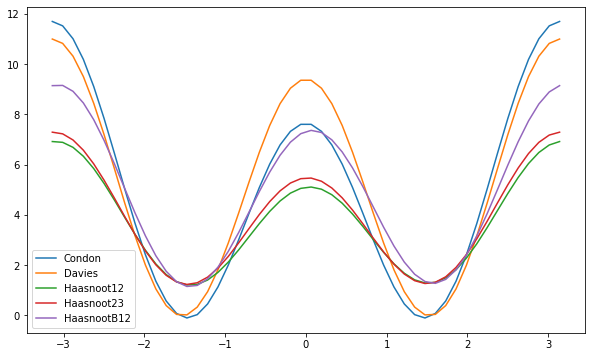

In [3]:
plt.figure(figsize=(10,6))
for l in [
    "Condon",
    "Davies",
    "Haasnoot12",
    "Haasnoot23",
#    "Haasnoot34",
    "HaasnootB12",
#    "Haasnoot12-check",
#    "HaasnootB23",
#    "HaasnootB34"
]:
    x=np.linspace(-np.pi,np.pi)
    plt.plot(x,karplus_sugar(x,par=l),label=l)
plt.legend()
plt.show()